In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# DATA LOADING FROM A CSV FILE TO PANDAS DATAFRAME

In [2]:
insurance_data_pred = pd.read_csv('insurance.csv')

In [3]:
insurance_data_pred.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# DATA INFO
insurance_data_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance_data_pred.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# DATA ANALYSIS

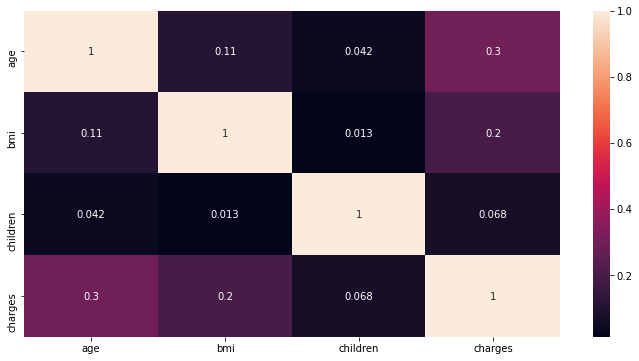

In [6]:
plt.figure(figsize=(12,6))
correl =insurance_data_pred.corr()
top_corr_features = correl.index
df = sns.heatmap(insurance_data_pred[top_corr_features].corr(),annot=True)


C:\Users\NIRAJ\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


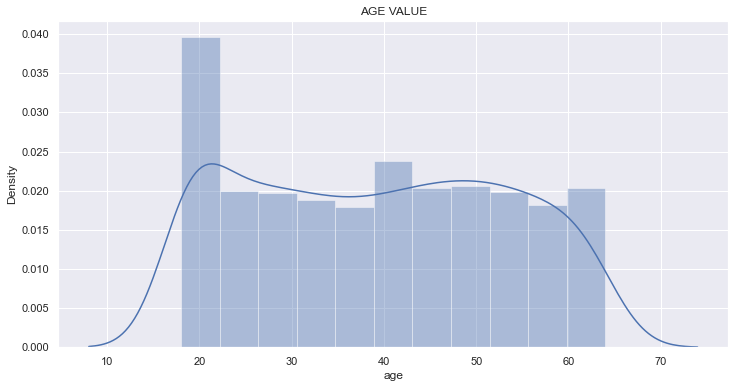

In [7]:
# DISTRIBUTION OF AGE VALUE

sns.set()
plt.figure(figsize=(12,6))
sns.distplot(insurance_data_pred['age'],kde = True)
plt.title('AGE VALUE')
plt.show()

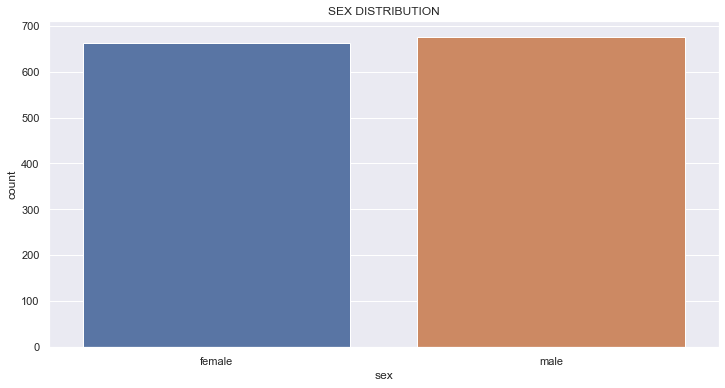

In [8]:
  #SEX COLUMN

plt.figure(figsize=(12,6))
sns.countplot(x = 'sex', data= insurance_data_pred)
plt.title('SEX DISTRIBUTION')
plt.show()

C:\Users\NIRAJ\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


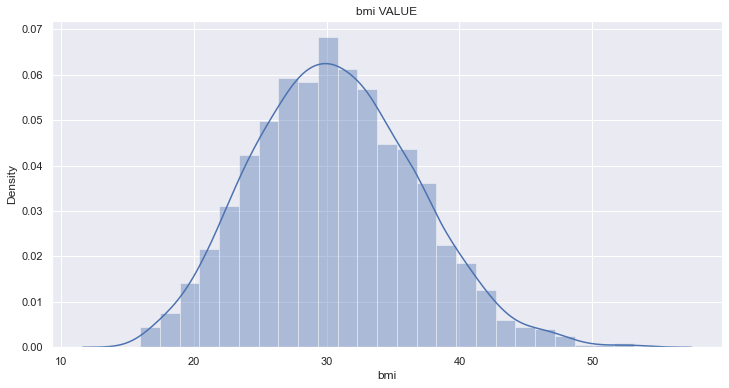

In [9]:
# DISTRIBUTION OF BMI VALUE

sns.set()
plt.figure(figsize=(12,6))
sns.distplot(insurance_data_pred['bmi'],kde = True)
plt.title('bmi VALUE')
plt.show()

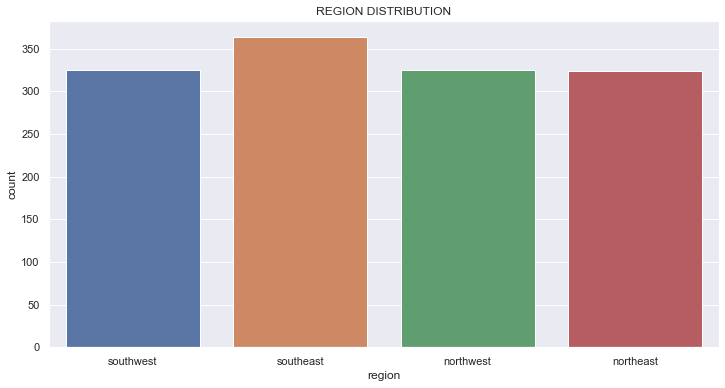

In [10]:
#  REGION COLUMN

plt.figure(figsize=(12,6))
sns.countplot(x = 'region', data= insurance_data_pred)
plt.title('REGION DISTRIBUTION')
plt.show()

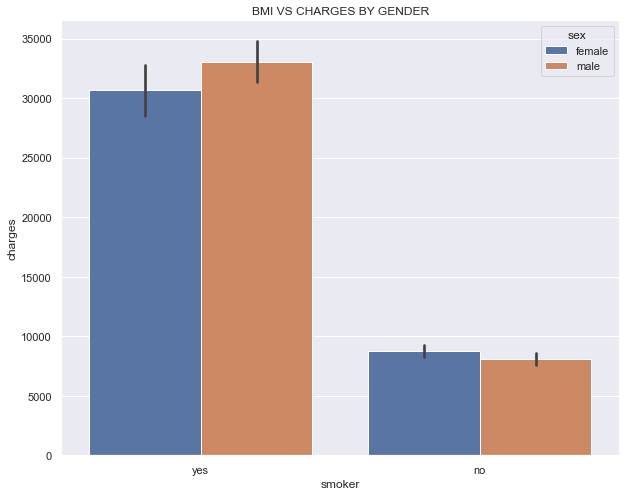

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(x ='smoker',y ='charges',hue='sex',data =insurance_data_pred)
plt.title('BMI VS CHARGES BY GENDER')
plt.show()

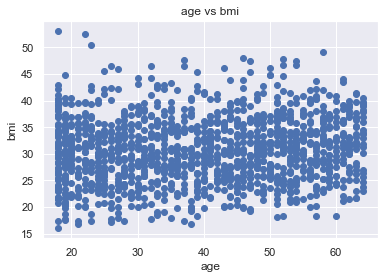

In [12]:
plt.scatter(x='age',y='bmi',data=insurance_data_pred)
plt.xlabel('age')
plt.ylabel('bmi')
plt.title('age vs bmi')
plt.show()

# DATA PREPROCESSING
# THERE ARE 3 CATEGORICAL FEATURES .

In [13]:
# 1 SEX
insurance_data_pred['sex']=insurance_data_pred['sex'].map({'female':1,'male':0})


In [14]:
# 2 SMOKER
insurance_data_pred['smoker']=insurance_data_pred['smoker'].map({'yes':0,'no':1})

In [15]:
# 3 REGION
insurance_data_pred['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
insurance_data_pred['region']=insurance_data_pred['region'].map({'southeast':0 , 'southwest':1 , 'northeast':2 , 'northwest':3})

In [17]:
insurance_data_pred.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [18]:
###  SPLITTING THE DATA
X =insurance_data_pred.drop(columns='charges',axis=1)
y =insurance_data_pred['charges']
print(X)
print(y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [19]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)

In [20]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1003, 6) (335, 6)


In [21]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [22]:
ridge=Ridge()
params={'alpha':[1e-15,1e-10,1e-6,1e-3,1e-2,1,5,10,20]}
ridge_regressor=GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-06, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [23]:
print(ridge_regressor.best_params_)

{'alpha': 1e-15}


In [24]:
print(ridge_regressor.best_score_)

-37395823.1891249


In [25]:
from sklearn.metrics import r2_score,confusion_matrix

In [26]:
y_pred=ridge_regressor.predict(X_test)

In [27]:
r2_test=r2_score(y_test,y_pred)

In [28]:
print(r2_test)

0.750068945071598


In [29]:
# lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [30]:
lasso=Lasso()
params={'alpha':[1e-15,1e-10,1e-6,1e-3,1e-2,1,5,10,20]}
lasso_regressor=GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=3)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-06, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [31]:
print(lasso_regressor.best_params_)

{'alpha': 1e-15}


In [32]:
from sklearn.metrics import r2_score,confusion_matrix

In [33]:
# EVALUATE
training_data_pred=lasso_regressor.predict(X_train)
r2_train=r2_score(y_train,training_data_pred)
print('R squared :',r2_train)

R squared : 0.7498535567296758


In [34]:
test_data_pred=lasso_regressor.predict(X_test)
r2_test=r2_score(y_test,test_data_pred)
print('R squared :',r2_test)

R squared : 0.750068945071598


# linear REGRESSION

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [37]:
# EVALUATE
training_data_pred1=lasso_regressor.predict(X_train)
r2_train=r2_score(y_train,training_data_pred1)
print('R squared :',r2_train)

R squared : 0.7498535567296758


In [38]:
test_data_pred1=lasso_regressor.predict(X_test)
r2_test=r2_score(y_test,test_data_pred1)
print('R squared :',r2_test)

R squared : 0.750068945071598


# BUILDING A PREDICTIVE MODEL

In [39]:
input_data = (19,1,27.9,0,1,1)

# changing input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
pred = regressor.predict(input_data_reshaped)

print(pred)

print('insurance cost is USD',pred[0])

[1866.38423566]
insurance cost is USD 1866.38423565654


# THANK YOU